## Import event log

In [72]:
import pm4py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
domestic_path = 'data/DomesticDeclarations.xes'
international_path = 'data/InternationalDeclarations.xes'

log= pm4py.read_xes(domestic_path)

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

/Users/ivan/Local/nak-dm-hw/.venv/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/ivan/Local/nak-dm-hw/.venv/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/ivan/Local/nak-dm-hw/.venv/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime

## Statistical Analysis of Event Data

In [27]:
log

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 08:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 10:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 08:34:44+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 16:31:22+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:26:14+00:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
...,...,...,...,...,...,...,...,...,...,...
56432,st_step 138363_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-12-29 16:50:14+00:00,EMPLOYEE,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56433,st_step 138361_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-12-29 16:56:13+00:00,ADMINISTRATION,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56434,st_step 138362_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2019-01-03 07:55:52+00:00,SUPERVISOR,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56435,dd_declaration 138359_19,SYSTEM,Request Payment,2019-01-08 07:20:28+00:00,UNDEFINED,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576


In [31]:
cases = log['case:id'].unique()
len(cases)

10500

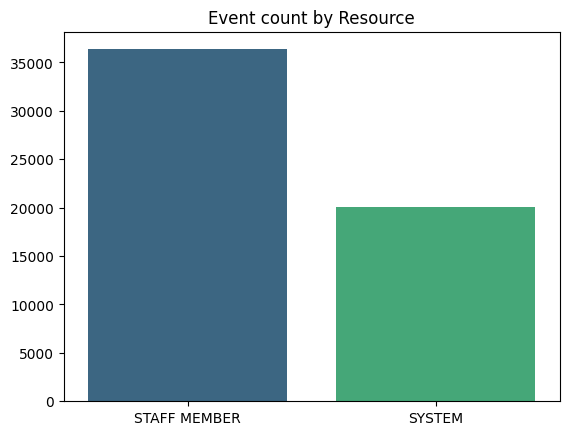

In [89]:
resources = log['org:resource'].unique()
sns.countplot(x='org:resource', data=log, palette='viridis').set(title='Event count by Resource', xlabel='', ylabel='');

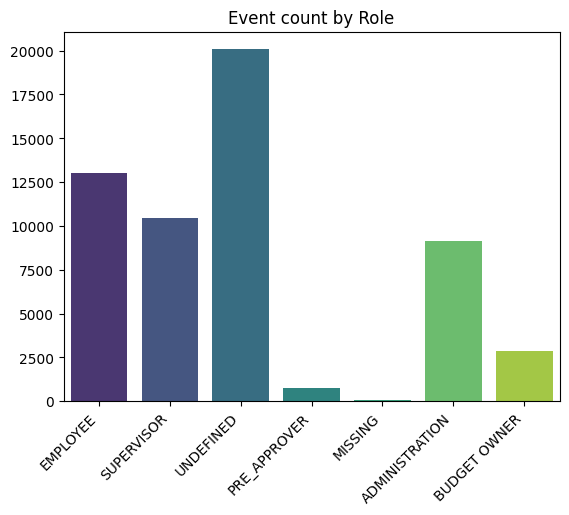

In [88]:
roles = log['org:role'].unique()
sns.countplot(x='org:role', data=log, palette='viridis').set(title='Event count by Role', xlabel='', ylabel='')
plt.xticks(rotation=45, ha='right');

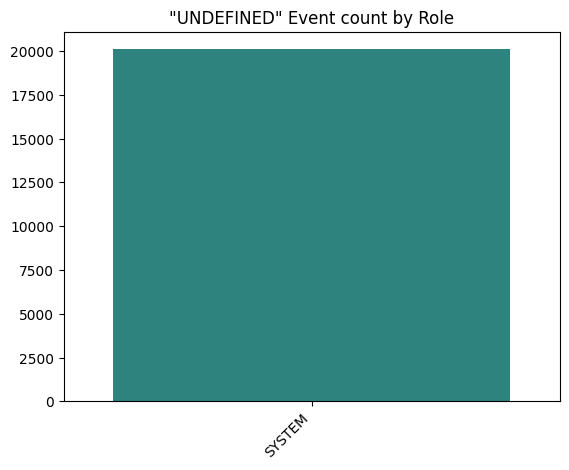

In [92]:
log_i = log[log['org:role'] == 'UNDEFINED']
sns.countplot(x='org:resource', data=log_i, palette='viridis').set(title='"UNDEFINED" Event count by Role', xlabel='', ylabel='')
plt.xticks(rotation=45, ha='right');

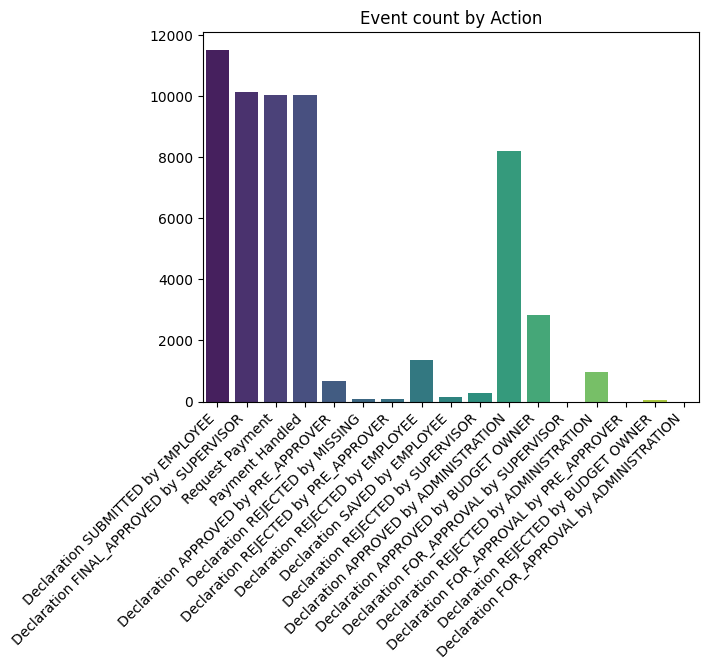

In [79]:
actions = log['concept:name'].unique()
sns.countplot(x='concept:name', data=log, palette='viridis').set(title='Event count by Action', xlabel='', ylabel='')
plt.xticks(rotation=45, ha='right');

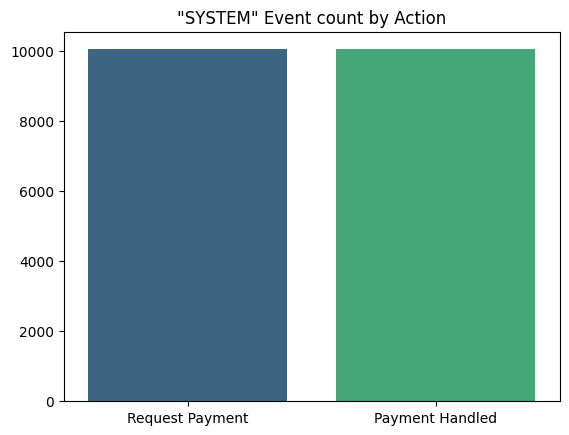

In [99]:
# System Events
log_s = log[log['org:resource'] == 'SYSTEM']
sns.countplot(x='concept:name', data=log_s, palette='viridis').set(title='"SYSTEM" Event count by Action', xlabel='', ylabel='');

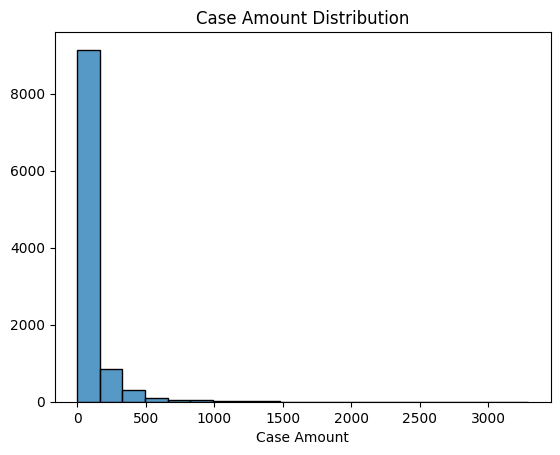

In [110]:
# case amount distribution for distinct case:id
distinct_case_amounts = log.groupby('case:id')['case:Amount'].max()
sns.histplot(distinct_case_amounts, kde=False, bins=20).set(title='Case Amount Distribution', xlabel='Case Amount', ylabel='');

## Process Discovery

In [ ]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

tree = inductive_miner.apply(log)

## Visualize Process Model

Having mined the model we may vizualize it as a Process Tree or Petri Net.

In [ ]:
from pm4py.visualization.process_tree import visualizer as pt_visualizer

# Visualize the process trees
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

## Derive Petri Net using inductive mining algorithm

In [ ]:
from pm4py import convert_to_petri_net as pt_converter
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Convert the process trees into petri nets
net1, initial_marking1, final_marking1 = pt_converter(tree1)
net2, initial_marking2, final_marking2 = pt_converter(tree2)

# Visualize the petri nets
gviz_pn1 = pn_visualizer.apply(net1, initial_marking1, final_marking1)
pn_visualizer.view(gviz_pn1)

gviz_pn2 = pn_visualizer.apply(net2, initial_marking2, final_marking2)
pn_visualizer.view(gviz_pn2)

## Performance Measures


In [ ]:
from pm4py.statistics.traces import cycle_time
from pm4py.statistics import variants
from pm4py.statistics.start_activities.log import get as start_activities
from pm4py.statistics.end_activities.log import get as end_activities

# Tasks frequency
start_activities_count1 = start_activities.get_start_activities(log_i)
end_activities_count1 = end_activities.get_end_activities(log_i)

start_activities_count2 = start_activities.get_start_activities(log_d)
end_activities_count2 = end_activities.get_end_activities(log_d)

# Case variants

# Inter-case time

In [ ]:
end_activities_count1

In [ ]:
log

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log, case_id_key='case:id', activity_key='case:concept:name', timestamp_key='time:timestamp')